In [1]:
# https://bitbucket.org/piedenis/lea/wiki/LeaPyTutorial1
# https://drive.google.com/file/d/0B1_ICcQCs7gebF9uVGdNdG1nR0E/view

import pandas as pd
import numpy as np

data = [
    ['a1', 'b1', 'c1', 1/8],
    ['a1', 'b1', 'c2', 1/8],
    ['a1', 'b2', 'c1', 1/8],
    ['a1', 'b2', 'c2', 1/8],
    ['a2', 'b1', 'c1', 1/8],
    ['a2', 'b1', 'c2', 1/8],
    ['a2', 'b2', 'c1', 1/8],
    ['a2', 'b2', 'c2', 1/8],
    ['a3', 'b2', 'a1', 1/8],
]

df = pd.DataFrame(data, columns=['A', 'B', 'C', 'value'])
df.set_index(list(df.columns[0:-1]))

value
A  B  C        
a1 b1 c1  0.125
      c2  0.125
   b2 c1  0.125
      c2  0.125
a2 b1 c1  0.125
      c2  0.125
   b2 c1  0.125
      c2  0.125
a3 b2 a1  0.125

In [14]:
df2 = df.groupby(['A', 'B', 'C']).sum()
print(type(df2))
series = df2.T.iloc[0]
series[:, :, 'a1'] 

series.groupby(level=['A', 'B']).sum()[tuple(['a1'])]

<class 'pandas.core.frame.DataFrame'>


B
b1    0.25
b2    0.25
Name: value, dtype: float64

$E_p[X] = \sum_{x} x · P(x)$

In [46]:
die = [
    ['one', 1/6],
    ['two', 1/6],
    ['three', 1/6],
    ['four', 1/6],
    ['five', 1/6],
    ['six', 1/6],
]

df = pd.DataFrame(die, columns=['Die', 'probability'])
df
somatorio = 0
for index, e in df.iterrows():
    somatorio += (1+index) * e['probability']

print(somatorio)

3.5


In [3]:
series['a1'] / 3

B   C 
b1  c1    0.041667
    c2    0.041667
b2  c1    0.041667
    c2    0.041667
Name: value, dtype: float64

In [4]:
series = [
    1,
    0,
    0,
    1,
    1
]

s = pd.Series(series, index=pd.Index(['head', 'tail', 'tail', 'head', 'head'], name='Coin'))
s.groupby(s.index).sum()

i = s.index
i.names

FrozenList(['Coin'])

In [5]:
df[df.A == 'a1'].value.sum() / df.value.sum()

0.4444444444444444

In [6]:
df[:][df.A=='a1'].set_index(list(df.columns[0:-1]))

value
A  B  C        
a1 b1 c1  0.125
      c2  0.125
   b2 c1  0.125
      c2  0.125

In [7]:
df.groupby(['A', 'B']).sum()

value
A  B        
a1 b1  0.250
   b2  0.250
a2 b1  0.250
   b2  0.250
a3 b2  0.125

In [8]:
actual = df.groupby(['A']).sum()
actual

,value
A,
a1,0.500
a2,0.500
a3,0.125


In [9]:
expected = pd.DataFrame([
    ['a1', 0.5],
    ['a2', 0.5]
], columns=['A', 'value'])
expected

,A,value
0,a1,0.5
1,a2,0.5


In [10]:
expected.set_index('A').equals(actual)

False

In [11]:
a = df[(df.A=='a1') & (df.B=='b1')].copy()
total = a.value.sum()

a.value = a.value / total
a

,A,B,C,value
0,a1,b1,c1,0.5
1,a1,b1,c2,0.5


In [12]:
class RandomVariable(object):

    def __init__(self, name):
        self.name = name

    def __eq__(self, other):
        if type(other) == RandomVariable:
            return self.name == other.name
        else:
            return RandomVariableEvent(self, other)

    def __repr__(self):
        return self.name

    def __or__(self, other):
        #print('casados')
        #print(self, other)
        pass
        
    def __bool__(self):
        print(self, 'asd')
        return False

X = RandomVariable('X')
Y = RandomVariable('Y')

#X | Y
X xor Y

SyntaxError: invalid syntax (<ipython-input-12-b22d23a62ad2>, line 28)

In [ ]:
d = df[(df.A=='a1') & (df.B=='b1')]
d.to_panel()

In [ ]:
from typing import overload

class Test:
    
    @overload
    def test(self: Test, name: str):
        print('string', name)
        
    @overload
    def test(self: Test, name: int):
        print('int', name)
        
    def test(self, name):
        print('default', name)
  
@overload
def test(name: str) -> None:
    print('string', name)

@overload
def test(name: int) -> None:
    print('int', name)

def test(name):
    print('default', name)

test('casa')
test(3)
test(None)

t = Test()
t.test('casa')
t.test(3)
t.test(None)

In [ ]:
@overload
def utf8(value: None) -> None:
    pass
@overload
def utf8(value: bytes) -> bytes:
    pass
@overload
def utf8(value: int) -> bytes:
    pass

def utf8(value):
    print(value)

utf8(None)

In [ ]:
from collections import Counter

c = Counter(dog=3, cat=4)

[[key, c[key]] for key in c]

In [ ]:
df.keys()
df.max()

In [ ]:
data = [
    ['low',  'A', 0.07],
    ['low',  'B', 0.28],
    ['low',  'C', 0.35],
    ['high', 'A', 0.18],
    ['high', 'B', 0.09],
    ['high', 'C', 0.03],
]

variables = ['Intelligence', 'Grade', 'probability']
i = pd.DataFrame(data, columns=variables)
i = i.set_index(keys=list(i.columns[:-1]))
i

In [ ]:
i.groupby(
    [
        i.index.get_level_values('Intelligence'),
        i.index.get_level_values('Grade'),
    ]
).sum()

In [ ]:
5 < np.linspace(0, 20, 11) < 10

In [ ]:
x = np.linspace(0, 20, 11)
np.sum((5 < x) & (x < 15))

In [ ]:
pd.__version__

In [ ]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

tuples = list(zip(*arrays))
tuples

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

In [ ]:
s = pd.Series(np.random.randn(8), index=index)
s

In [ ]:
s['bar':'foo']

In [ ]:
s['bar'].sum()

In [ ]:
from collections import Counter

c = Counter(a=4, b=2, c=0, d=-2)
list(c.elements())
c.fromkeys()

In [ ]:
data = [['head', 1],
 ['tails', 1],
 ['head', 1],
 ['tails', 1],
 ['head', 1],
 ['tails', 1]]

df = pd.DataFrame(data, columns=list(['Coin']) + ['probability'])

df.groupby(list(df.columns[:-1])).sum().T.iloc[0]

In [ ]:
data = pd.Series(['Paulo', 2], dtype=('U10', float))
data

In [ ]:
d = np.dtype({
    'names': ('Coin', 'House', 'probability'),
    'formats': ('U2', 'U2', 'f')
})

lista = [
    ['a', 'b', 3],
    ['a', 'c', 3],
    ['e', 'd', 3]
]
array = np.asarray([tuple(e) for e in lista], dtype=d)
array

In [ ]:
array[:]

In [ ]:
lista = [
    ['a', 'b', 3],
    ['a', 'c', 3],
    ['e', 'd', 3]
]
array = np.asarray([tuple(e) for e in lista])
array[:, 0]

In [ ]:
s = pd.Series(index=pd.Index([], name=['Coin', 'Die']))
s2 = pd.Series(['head', 3], index=pd.Index([], name=['Coin', 'Die']))

In [ ]:
columns = [
    ['head', 'tail', 'head'],
    ['two', 'three', 'four'],
]

columns = list(zip(*columns))

index = pd.MultiIndex.from_tuples(columns, names=['Coin', 'Die'])
#index = pd.Index(columns, name='Coin')

pd.Series([2, 3, 4], index=index)

In [ ]:
columns = [
    'head'
    'tail'
]

index = pd.MultiIndex.from_arrays(columns, names=['Coin'])
#index = pd.Index(columns, name='Coin')

pd.Series([2, 3], index=index)

In [ ]:
from functools import reduce

reduce(lambda a, b: print(a, b), [0,1,2], 4)

In [ ]:
from probability.experiment import Occurrence, Experiment

expected = [
    Occurrence('a1'),
    Occurrence('a1'),
    Occurrence('a2'),
    #Occurrence(['a1', 'b1', 'c1']),
    #Occurrence(['a1', 'b1', 'c2'], 3),
    #Occurrence(['a1', 'b2', 'c1']),
    #Occurrence(['a1', 'b2', 'c1']),
]

#experiment = Experiment('A', 'B', 'C')
experiment = Experiment('A')

for occurrence in expected:
    experiment.register(occurrence)

series = experiment.to_series()
#series.index.groupby(series.index)
series


In [ ]:
#series.groupby(('A', 'B', 'C')).sum()
series.index.values

In [ ]:
series.groupby(level=series.index.names).sum()

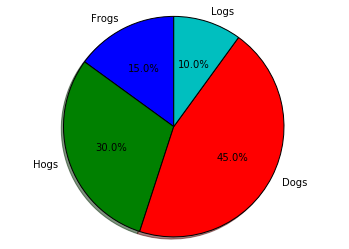

In [53]:

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [.15, .30, .45, .10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [57]:
from fractions import Fraction
series.map(lambda x: Fraction(x))

A   B   C 
a1  b1  c1    1/8
        c2    1/8
    b2  c1    1/8
        c2    1/8
a2  b1  c1    1/8
        c2    1/8
    b2  c1    1/8
        c2    1/8
a3  b2  a1    1/8
Name: value, dtype: object

In [198]:
#series[('a1':'a2', 'b1')]#[:,'b1']

index = list({'a2', 'a1'}), 'b1'

series.groupby(level=['A', 'B']).sum().loc[index]

A   B 
a1  b1    0.25
a2  b1    0.25
Name: value, dtype: float64